In [1]:
import pandas as pd
import numpy as np
import threading
import time
import queue
import matplotlib.pyplot as plt
from tensorflow.keras.models import model_from_json

In [2]:
# Lista para guardar las predicciones
history = []

# Parámetros de normalización para conjunto TS1-4_COOLER
T_C_0_num = 30.355
T_C_0_den = 31.739

In [3]:
# Función de normalización
def normalize(x):
  return (x - T_C_0_num) / T_C_0_den

In [4]:
# Lógica del proceso Simulador
def simulator(thread_name, console_lock):
    for i in range(len(sds)):
        # Pausa de un segundo entre entregas de datos
        time.sleep(1)
        # Inserción de los datos en el repositorio FIFO
        q.put(sds[i])
        with console_lock:
            print("Proceso Simulador de Lecturas - Proc.Nro. " + str(threading.get_ident()))
            print("Lecturas enviadas: ", sds[i])

In [5]:
# Lógica del proceso predictor
def predictor(thread_name, console_lock, loaded_model):
    pred_counter = 0
    serie = np.empty((1, 4))
    while (pred_counter < 150):
        if q.qsize() > 0: # Hay datos en el repositorio
            b = q.get()
            with console_lock:
                print("Proceso Predictor - Proc.Nro. " + str(threading.get_ident()))
                print("Predicción Nro.: ", pred_counter, " - Datos Recibidos: ", b)
                print("Objetos restantes en la cola: " + str(q.qsize()))
                # Preparado de la Serie
                if pred_counter == 0:
                    serie = np.array([b])
                else:
                    serie = np.append(serie, np.array([b]), axis=0)
                # Gráfica de la serie acumulada
                plt.plot(serie)
                # Plot de la salida normalizada a la cota máxima de temperaturas para mejor visualización
                plt.plot([h * 30 for h in history], linewidth=4, color='black')
                plt.show()

                # Predicción
                if len(serie) > 9: # Hay suficientes datos para predecir
                    x = normalize(serie[-10:, :])
                    # print("Ultimas 10 lecturas recibidas")
                    # print(x)
                    pred_val = loaded_model.predict(np.array([x]))
                    i_pred_val = np.argmax(pred_val)
                    history.append(i_pred_val)
                    print("Predicción: ", pred_val, "Etiqueta: ", i_pred_val)
                    print("Estado en 50 segundos: ", text_labels[i_pred_val])

                else:
                    print("No hay suficientes datos para realizar una predicción.")
                    history.append(2)
                pred_counter += 1
        else:
            time.sleep(1)
    # Guardado en archivo del resultado de las predicciones
    mat = np.matrix(history)
    with open('resultados_h_p_s_1.txt', 'wb') as f:
        for line in mat:
            np.savetxt(f, line, fmt='%.4f', delimiter='\t')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 100)            2500      
_________________________________________________________________
layer_conv_2 (Conv1D)        (None, 3, 100)            30100     
_________________________________________________________________
G_A_P_1D (GlobalAveragePooli (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 303       
Total params: 32,903
Trainable params: 32,903
Non-trainable params: 0
_________________________________________________________________
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [35.45   39.5351 38.2133 29.693 ]
Proceso Predictor

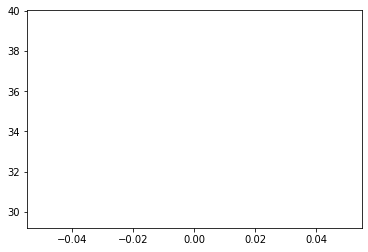

No hay suficientes datos para realizar una predicción.
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [35.5394 40.6402 38.2167 29.6887]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  1  - Datos Recibidos:  [35.5394 40.6402 38.2167 29.6887]
Objetos restantes en la cola: 0


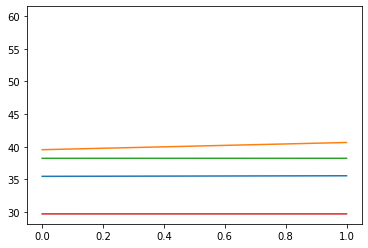

No hay suficientes datos para realizar una predicción.
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [35.3348 40.4776 37.8885 29.888 ]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  2  - Datos Recibidos:  [35.3348 40.4776 37.8885 29.888 ]
Objetos restantes en la cola: 0


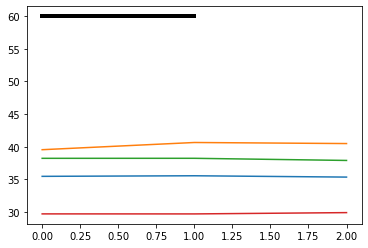

No hay suficientes datos para realizar una predicción.
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [35.3122 40.872  38.731  30.9143]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  3  - Datos Recibidos:  [35.3122 40.872  38.731  30.9143]
Objetos restantes en la cola: 0


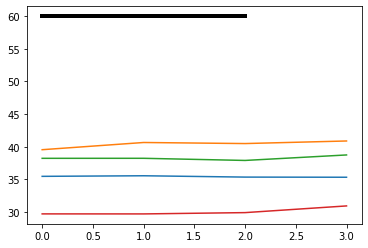

No hay suficientes datos para realizar una predicción.
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [35.6095 40.9174 38.6799 30.6012]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  4  - Datos Recibidos:  [35.6095 40.9174 38.6799 30.6012]
Objetos restantes en la cola: 0


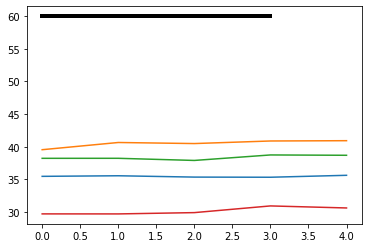

No hay suficientes datos para realizar una predicción.
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [35.9326 41.1298 38.9276 30.3435]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  5  - Datos Recibidos:  [35.9326 41.1298 38.9276 30.3435]
Objetos restantes en la cola: 0


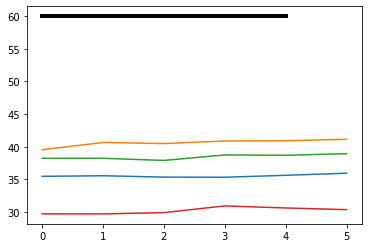

No hay suficientes datos para realizar una predicción.
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [35.4876 40.9594 38.394  30.891 ]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  6  - Datos Recibidos:  [35.4876 40.9594 38.394  30.891 ]
Objetos restantes en la cola: 0


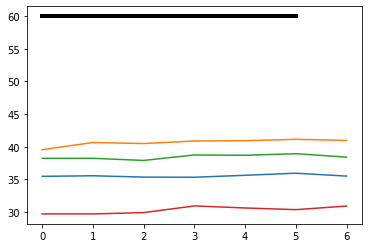

No hay suficientes datos para realizar una predicción.
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [36.3761 40.7343 38.716  31.1916]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  7  - Datos Recibidos:  [36.3761 40.7343 38.716  31.1916]
Objetos restantes en la cola: 0


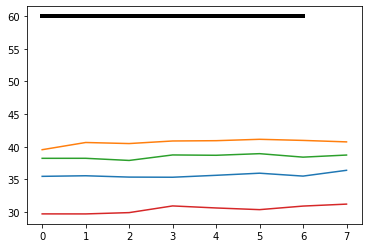

No hay suficientes datos para realizar una predicción.
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [35.8528 41.0058 38.6472 31.2026]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  8  - Datos Recibidos:  [35.8528 41.0058 38.6472 31.2026]
Objetos restantes en la cola: 0


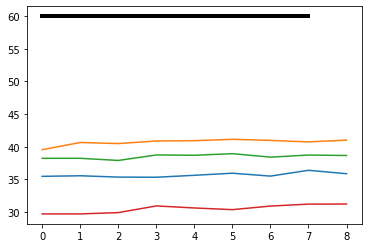

No hay suficientes datos para realizar una predicción.
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [36.3389 41.7858 38.8314 31.5528]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  9  - Datos Recibidos:  [36.3389 41.7858 38.8314 31.5528]
Objetos restantes en la cola: 0


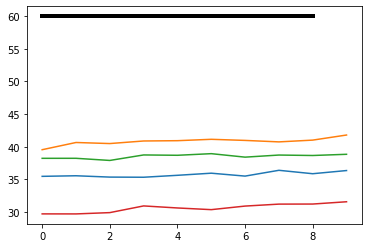

Predicción:  [[3.259991e-06 6.621255e-05 9.999305e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [36.2764 41.7879 39.1647 31.397 ]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  10  - Datos Recibidos:  [36.2764 41.7879 39.1647 31.397 ]
Objetos restantes en la cola: 0


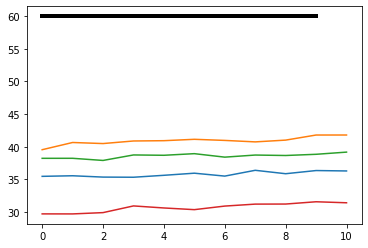

Predicción:  [[3.7300315e-06 7.4348565e-05 9.9992192e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [36.8394 41.6678 38.6303 31.5382]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  11  - Datos Recibidos:  [36.8394 41.6678 38.6303 31.5382]
Objetos restantes en la cola: 0


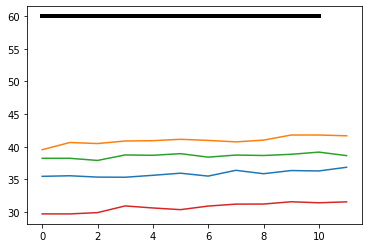

Predicción:  [[4.1844983e-06 8.2450097e-05 9.9991333e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [37.3374 42.0768 39.4764 31.4056]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  12  - Datos Recibidos:  [37.3374 42.0768 39.4764 31.4056]
Objetos restantes en la cola: 0


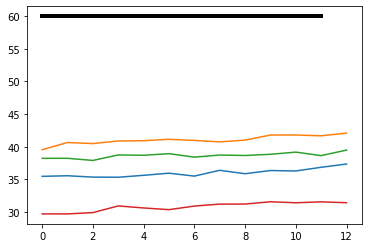

Predicción:  [[4.5757083e-06 8.9569789e-05 9.9990582e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [37.1547 41.7007 38.9498 31.8758]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  13  - Datos Recibidos:  [37.1547 41.7007 38.9498 31.8758]
Objetos restantes en la cola: 0


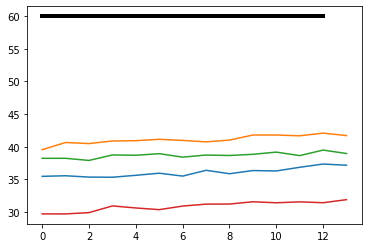

Predicción:  [[4.9994619e-06 9.7580261e-05 9.9989736e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [36.9644 42.5408 38.9154 32.1569]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  14  - Datos Recibidos:  [36.9644 42.5408 38.9154 32.1569]
Objetos restantes en la cola: 0


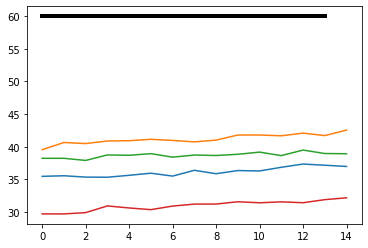

Predicción:  [[5.3751796e-06 1.0541744e-04 9.9988925e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [37.5987 42.0449 39.0943 32.5823]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  15  - Datos Recibidos:  [37.5987 42.0449 39.0943 32.5823]
Objetos restantes en la cola: 0


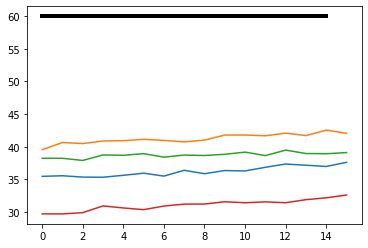

Predicción:  [[5.9615404e-06 1.1776118e-04 9.9987626e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [37.6599 43.0303 39.6362 32.1184]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  16  - Datos Recibidos:  [37.6599 43.0303 39.6362 32.1184]
Objetos restantes en la cola: 0


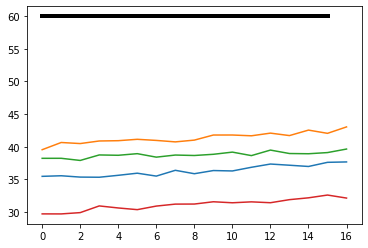

Predicción:  [[6.8152431e-06 1.3606848e-04 9.9985707e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [37.1555 43.3128 39.3982 31.9618]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  17  - Datos Recibidos:  [37.1555 43.3128 39.3982 31.9618]
Objetos restantes en la cola: 0


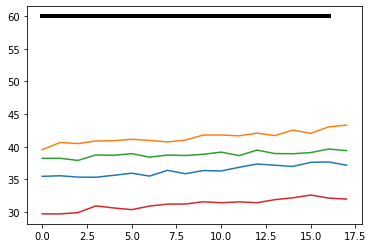

Predicción:  [[7.9766169e-06 1.6134116e-04 9.9983060e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [37.9535 43.3618 40.1115 32.4692]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  18  - Datos Recibidos:  [37.9535 43.3618 40.1115 32.4692]
Objetos restantes en la cola: 0


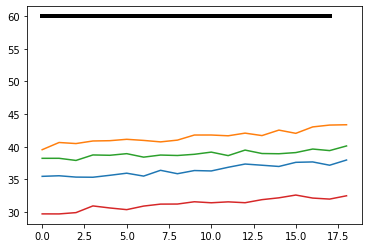

Predicción:  [[9.0736557e-06 1.8857032e-04 9.9980241e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [38.3923 43.32   39.5841 32.6712]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  19  - Datos Recibidos:  [38.3923 43.32   39.5841 32.6712]
Objetos restantes en la cola: 0


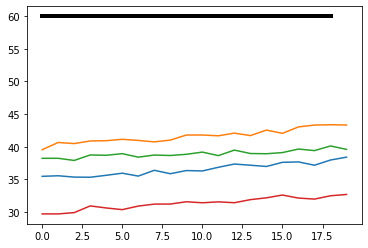

Predicción:  [[1.0056123e-05 2.1579163e-04 9.9977416e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [37.6643 42.8692 39.7774 33.3422]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  20  - Datos Recibidos:  [37.6643 42.8692 39.7774 33.3422]
Objetos restantes en la cola: 0


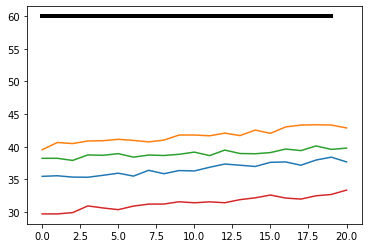

Predicción:  [[1.1483874e-05 2.5526888e-04 9.9973327e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [37.8692 43.7346 39.7195 33.1985]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  21  - Datos Recibidos:  [37.8692 43.7346 39.7195 33.1985]
Objetos restantes en la cola: 0


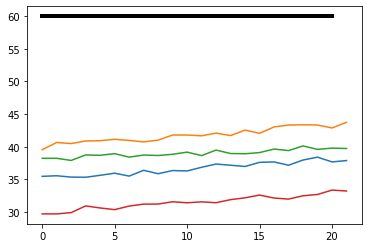

Predicción:  [[1.38586365e-05 3.16357997e-04 9.99669790e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [38.8757 43.8127 40.2377 33.1121]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  22  - Datos Recibidos:  [38.8757 43.8127 40.2377 33.1121]
Objetos restantes en la cola: 0


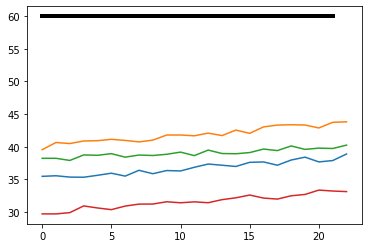

Predicción:  [[1.7627477e-05 4.1524053e-04 9.9956709e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [38.8811 44.0661 40.6967 33.4629]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  23  - Datos Recibidos:  [38.8811 44.0661 40.6967 33.4629]
Objetos restantes en la cola: 0


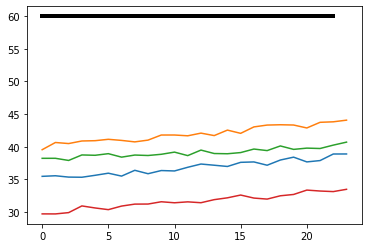

Predicción:  [[2.3204480e-05 5.6572043e-04 9.9941111e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [38.8259 44.3    39.9471 32.9721]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  24  - Datos Recibidos:  [38.8259 44.3    39.9471 32.9721]
Objetos restantes en la cola: 0


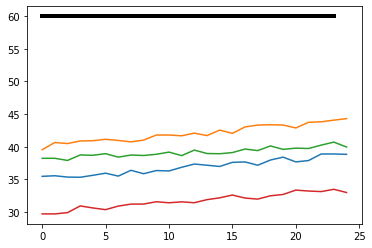

Predicción:  [[3.1752734e-05 8.0060010e-04 9.9916768e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.0199 44.4155 40.0332 33.28  ]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  25  - Datos Recibidos:  [39.0199 44.4155 40.0332 33.28  ]
Objetos restantes en la cola: 0


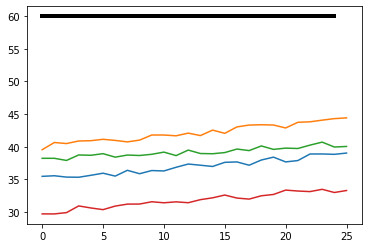

Predicción:  [[4.2943437e-05 1.1150616e-03 9.9884206e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [38.5369 44.6724 41.0066 33.1318]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  26  - Datos Recibidos:  [38.5369 44.6724 41.0066 33.1318]
Objetos restantes en la cola: 0


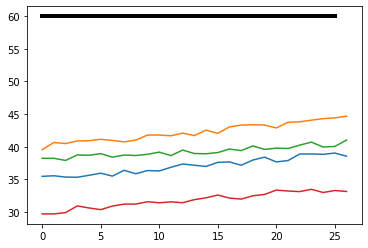

Predicción:  [[5.2022584e-05 1.3881470e-03 9.9855989e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.466  44.2537 40.7104 33.8602]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  27  - Datos Recibidos:  [39.466  44.2537 40.7104 33.8602]
Objetos restantes en la cola: 0


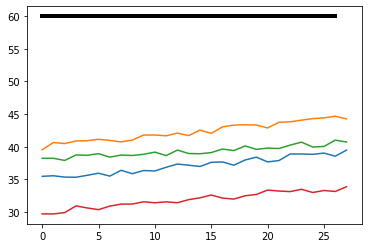

Predicción:  [[5.7199264e-05 1.5807486e-03 9.9836200e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.0659 44.6674 40.9943 34.1924]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  28  - Datos Recibidos:  [39.0659 44.6674 40.9943 34.1924]
Objetos restantes en la cola: 0


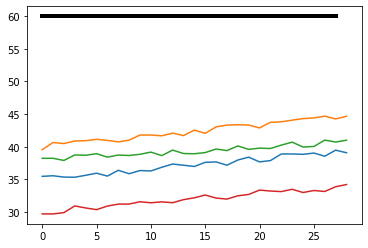

Predicción:  [[6.1327664e-05 1.7564187e-03 9.9818230e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.2207 44.9016 41.2894 34.2905]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  29  - Datos Recibidos:  [39.2207 44.9016 41.2894 34.2905]
Objetos restantes en la cola: 0


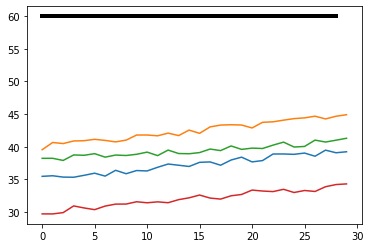

Predicción:  [[7.2283750e-05 2.1445409e-03 9.9778324e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.0945 44.8126 40.8306 34.2478]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  30  - Datos Recibidos:  [39.0945 44.8126 40.8306 34.2478]
Objetos restantes en la cola: 0


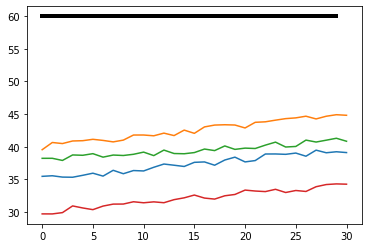

Predicción:  [[9.2234099e-05 2.8180454e-03 9.9708980e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [38.8167 44.9512 40.6579 34.2495]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  31  - Datos Recibidos:  [38.8167 44.9512 40.6579 34.2495]
Objetos restantes en la cola: 0


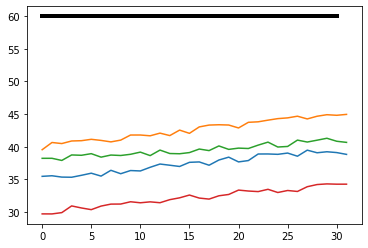

Predicción:  [[1.2423152e-04 3.8801441e-03 9.9599564e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.5098 44.8938 41.2873 34.1535]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  32  - Datos Recibidos:  [39.5098 44.8938 41.2873 34.1535]
Objetos restantes en la cola: 0


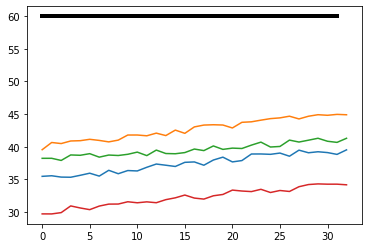

Predicción:  [[1.6997484e-04 5.4058628e-03 9.9442416e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.1639 45.9213 40.7749 34.5115]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  33  - Datos Recibidos:  [39.1639 45.9213 40.7749 34.5115]
Objetos restantes en la cola: 0


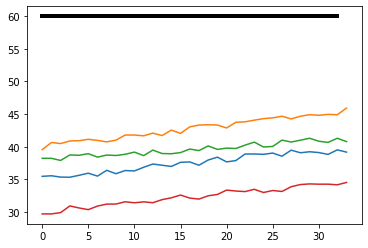

Predicción:  [[2.2546214e-04 7.2824717e-03 9.9249202e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.1932 46.058  41.017  34.6325]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  34  - Datos Recibidos:  [39.1932 46.058  41.017  34.6325]
Objetos restantes en la cola: 0


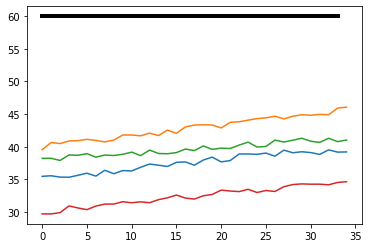

Predicción:  [[2.8181658e-04 9.3197515e-03 9.9039841e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.6182 45.695  41.1525 34.4756]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  35  - Datos Recibidos:  [39.6182 45.695  41.1525 34.4756]
Objetos restantes en la cola: 0


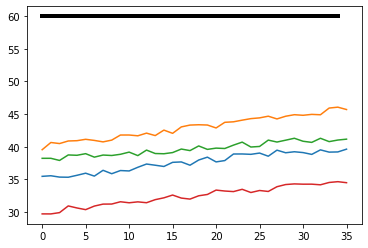

Predicción:  [[3.1925371e-04 1.0830513e-02 9.8885018e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.0754 46.3666 41.782  34.3466]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  36  - Datos Recibidos:  [39.0754 46.3666 41.782  34.3466]
Objetos restantes en la cola: 0


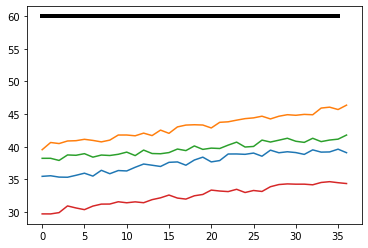

Predicción:  [[3.3166510e-04 1.1565430e-02 9.8810285e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.4844 46.247  41.9363 34.8587]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  37  - Datos Recibidos:  [39.4844 46.247  41.9363 34.8587]
Objetos restantes en la cola: 0


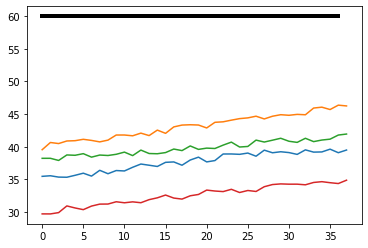

Predicción:  [[3.2774860e-04 1.1758702e-02 9.8791355e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.8358 46.2988 42.0775 35.2592]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  38  - Datos Recibidos:  [39.8358 46.2988 42.0775 35.2592]
Objetos restantes en la cola: 0


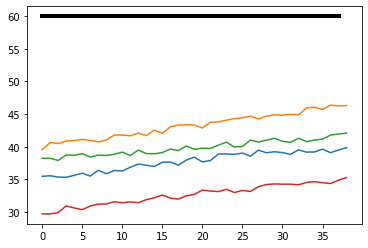

Predicción:  [[3.2786524e-04 1.2180533e-02 9.8749161e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.1715 46.0639 42.0558 35.2476]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  39  - Datos Recibidos:  [39.1715 46.0639 42.0558 35.2476]
Objetos restantes en la cola: 0


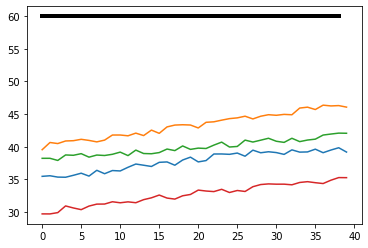

Predicción:  [[3.5567285e-04 1.3735242e-02 9.8590904e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.3388 46.918  42.0395 35.052 ]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  40  - Datos Recibidos:  [39.3388 46.918  42.0395 35.052 ]
Objetos restantes en la cola: 0


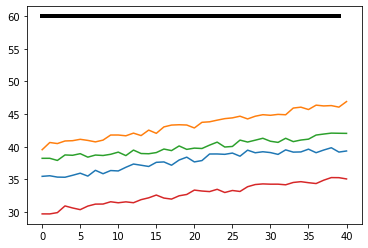

Predicción:  [[4.1021465e-04 1.6354406e-02 9.8323536e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.2028 46.9164 41.7025 35.6792]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  41  - Datos Recibidos:  [39.2028 46.9164 41.7025 35.6792]
Objetos restantes en la cola: 0


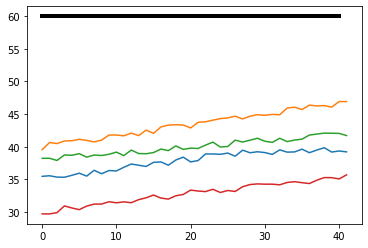

Predicción:  [[4.9305730e-04 2.0176126e-02 9.7933084e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.6359 46.5609 42.3865 35.2842]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  42  - Datos Recibidos:  [39.6359 46.5609 42.3865 35.2842]
Objetos restantes en la cola: 0


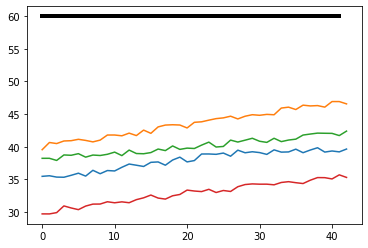

Predicción:  [[5.9208809e-04 2.4839140e-02 9.7456884e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.3721 46.6776 42.3072 35.0586]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  43  - Datos Recibidos:  [39.3721 46.6776 42.3072 35.0586]
Objetos restantes en la cola: 0


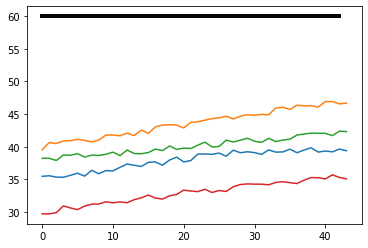

Predicción:  [[7.1969017e-04 3.0894971e-02 9.6838534e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.2652 46.4478 42.0045 35.3362]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  44  - Datos Recibidos:  [39.2652 46.4478 42.0045 35.3362]
Objetos restantes en la cola: 0


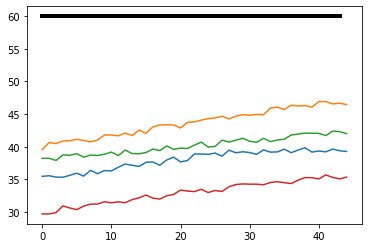

Predicción:  [[8.4147369e-04 3.6771331e-02 9.6238726e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.8117 46.8032 42.6366 35.984 ]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  45  - Datos Recibidos:  [39.8117 46.8032 42.6366 35.984 ]
Objetos restantes en la cola: 0


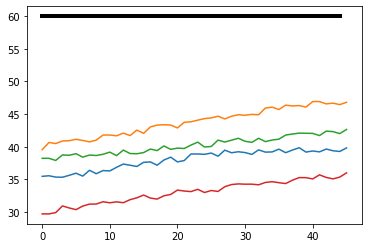

Predicción:  [[9.4478921e-04 4.1803967e-02 9.5725125e-01]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.0241 47.6022 42.0545 36.2373]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  46  - Datos Recibidos:  [40.0241 47.6022 42.0545 36.2373]
Objetos restantes en la cola: 0


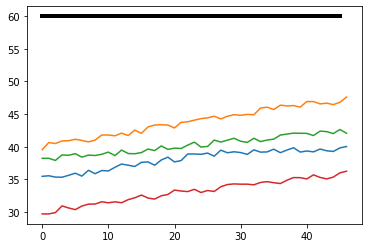

Predicción:  [[0.00105712 0.04736729 0.9515756 ]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.5872 47.3111 42.1967 36.0207]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  47  - Datos Recibidos:  [39.5872 47.3111 42.1967 36.0207]
Objetos restantes en la cola: 0


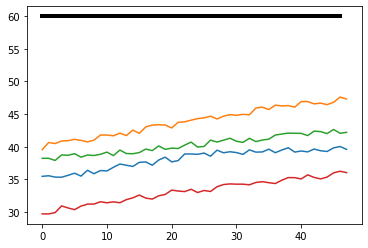

Predicción:  [[0.00125308 0.05693528 0.9418116 ]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.5804 47.8028 42.0719 35.9314]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  48  - Datos Recibidos:  [39.5804 47.8028 42.0719 35.9314]
Objetos restantes en la cola: 0


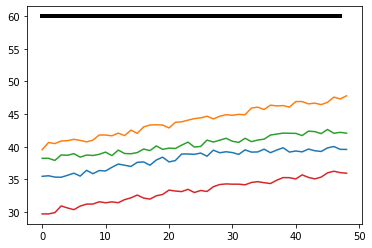

Predicción:  [[0.00155371 0.07162221 0.9268241 ]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.931  47.4171 42.2699 35.7917]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  49  - Datos Recibidos:  [39.931  47.4171 42.2699 35.7917]
Objetos restantes en la cola: 0


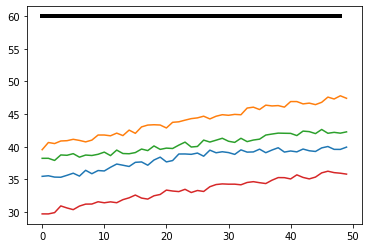

Predicción:  [[0.00187639 0.0879387  0.9101849 ]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.3766 47.6684 42.9032 36.4842]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  50  - Datos Recibidos:  [40.3766 47.6684 42.9032 36.4842]
Objetos restantes en la cola: 0


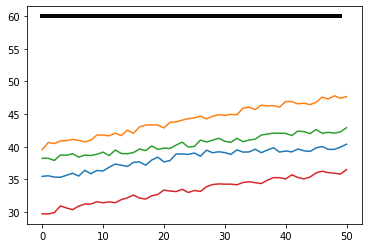

Predicción:  [[0.00221385 0.10596891 0.8918173 ]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.2828 47.3543 42.4422 36.6027]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  51  - Datos Recibidos:  [40.2828 47.3543 42.4422 36.6027]
Objetos restantes en la cola: 0


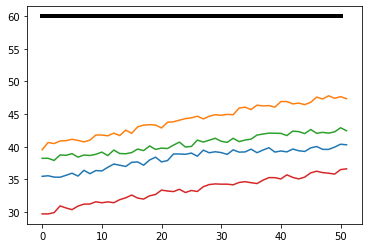

Predicción:  [[0.0026329  0.12912165 0.8682454 ]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.0528 47.8879 42.4625 36.7341]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  52  - Datos Recibidos:  [40.0528 47.8879 42.4625 36.7341]
Objetos restantes en la cola: 0


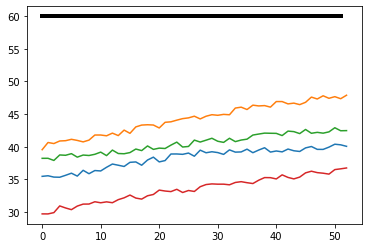

Predicción:  [[0.00320121 0.16094606 0.83585274]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.4638 48.0849 42.6574 36.6626]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  53  - Datos Recibidos:  [40.4638 48.0849 42.6574 36.6626]
Objetos restantes en la cola: 0


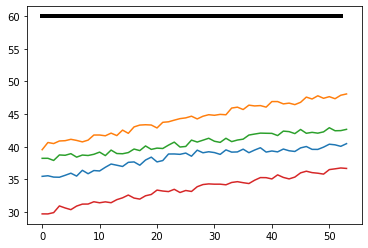

Predicción:  [[0.00387497 0.19839786 0.79772717]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.8207 48.4919 42.6557 36.2507]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  54  - Datos Recibidos:  [39.8207 48.4919 42.6557 36.2507]
Objetos restantes en la cola: 0


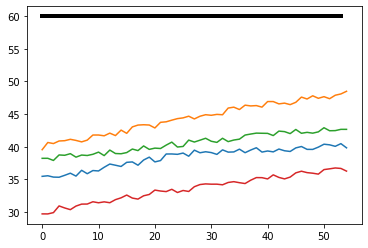

Predicción:  [[0.00446098 0.23192453 0.76361454]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.9801 48.0764 43.2958 36.8493]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  55  - Datos Recibidos:  [39.9801 48.0764 43.2958 36.8493]
Objetos restantes en la cola: 0


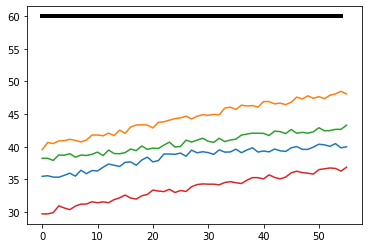

Predicción:  [[0.00503634 0.2666023  0.72836137]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.0224 48.5339 43.4601 36.7003]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  56  - Datos Recibidos:  [40.0224 48.5339 43.4601 36.7003]
Objetos restantes en la cola: 0


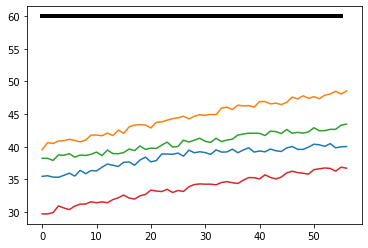

Predicción:  [[0.00542092 0.29323086 0.7013482 ]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [39.9157 48.6224 42.8625 36.7771]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  57  - Datos Recibidos:  [39.9157 48.6224 42.8625 36.7771]
Objetos restantes en la cola: 0


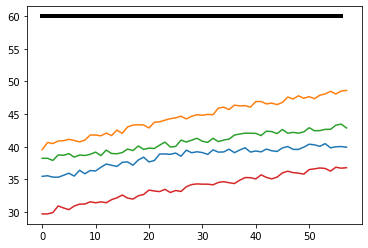

Predicción:  [[0.00568966 0.31544134 0.678869  ]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.1507 48.504  43.3224 37.0925]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  58  - Datos Recibidos:  [40.1507 48.504  43.3224 37.0925]
Objetos restantes en la cola: 0


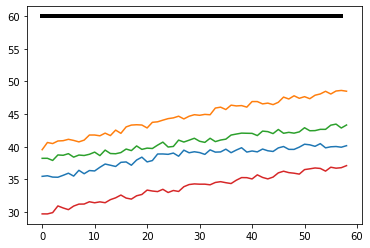

Predicción:  [[0.00564732 0.32178688 0.6725658 ]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.2191 48.4462 43.8272 36.3605]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  59  - Datos Recibidos:  [40.2191 48.4462 43.8272 36.3605]
Objetos restantes en la cola: 0


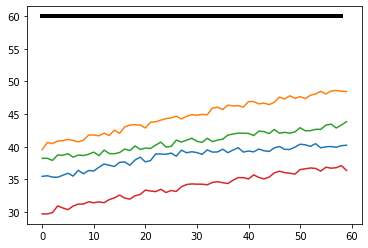

Predicción:  [[0.00547255 0.3198826  0.6746449 ]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.4377 48.2773 43.0989 36.7231]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  60  - Datos Recibidos:  [40.4377 48.2773 43.0989 36.7231]
Objetos restantes en la cola: 0


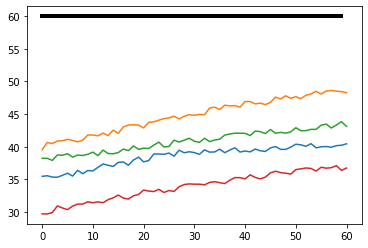

Predicción:  [[0.00533999 0.31964758 0.6750124 ]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.2143 48.0925 44.0074 36.7066]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  61  - Datos Recibidos:  [40.2143 48.0925 44.0074 36.7066]
Objetos restantes en la cola: 0


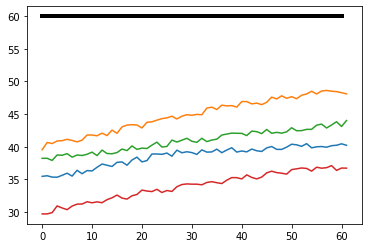

Predicción:  [[0.00530026 0.32158044 0.6731193 ]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.0777 48.5429 44.0046 36.8496]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  62  - Datos Recibidos:  [40.0777 48.5429 44.0046 36.8496]
Objetos restantes en la cola: 0


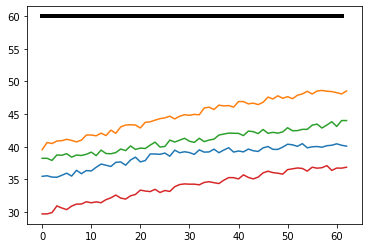

Predicción:  [[0.00540659 0.33181098 0.66278243]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.9479 48.0825 43.712  36.6802]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  63  - Datos Recibidos:  [40.9479 48.0825 43.712  36.6802]
Objetos restantes en la cola: 0


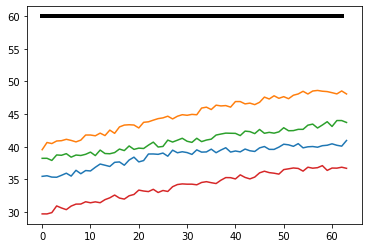

Predicción:  [[0.00548449 0.33874914 0.65576637]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [41.0614 48.4986 44.2528 37.246 ]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  64  - Datos Recibidos:  [41.0614 48.4986 44.2528 37.246 ]
Objetos restantes en la cola: 0


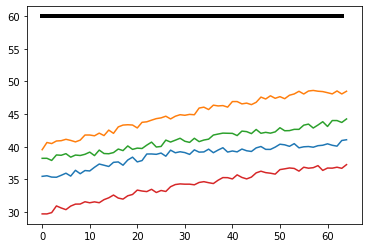

Predicción:  [[0.00564995 0.35201693 0.64233315]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.8442 48.2736 43.5706 36.9719]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  65  - Datos Recibidos:  [40.8442 48.2736 43.5706 36.9719]
Objetos restantes en la cola: 0


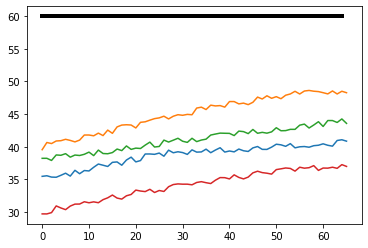

Predicción:  [[0.00597366 0.37477008 0.6192563 ]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  66  - Datos Recibidos:  [40.5109 48.7978 43.6554 37.2003]
Objetos restantes en la cola: 0


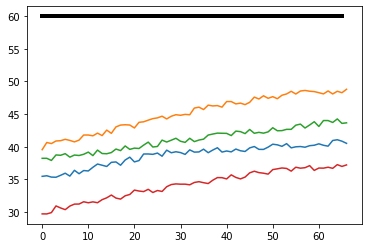

Predicción:  [[0.0065003  0.41085446 0.5826453 ]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.5109 48.7978 43.6554 37.2003]
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.5682 48.5316 43.5315 37.073 ]
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [41.0927 48.4505 43.9324 37.0633]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  67  - Datos Recibidos:  [40.5682 48.5316 43.5315 37.073 ]
Objetos restantes en la cola: 1


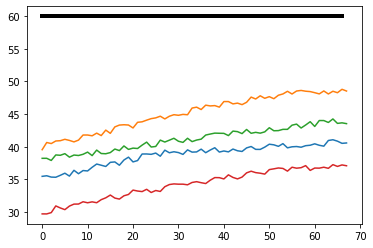

Predicción:  [[0.00717892 0.45594847 0.5368726 ]] Etiqueta:  2
Estado en 50 segundos:  EFICIENCIA TOTAL
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  68  - Datos Recibidos:  [41.0927 48.4505 43.9324 37.0633]
Objetos restantes en la cola: 0


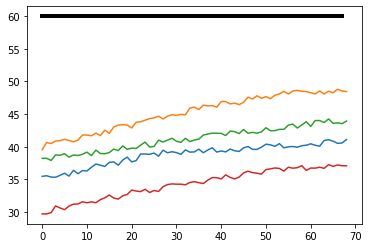

Predicción:  [[0.00775808 0.49641106 0.49583092]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.9215 48.3943 44.0832 37.9597]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  69  - Datos Recibidos:  [40.9215 48.3943 44.0832 37.9597]
Objetos restantes en la cola: 0


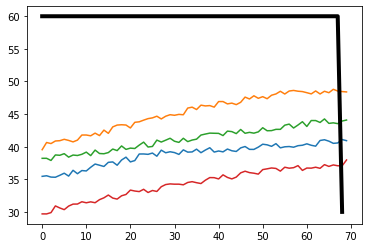

Predicción:  [[0.00842999 0.5436635  0.44790655]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [41.2284 48.773  44.1834 37.5384]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  70  - Datos Recibidos:  [41.2284 48.773  44.1834 37.5384]
Objetos restantes en la cola: 0


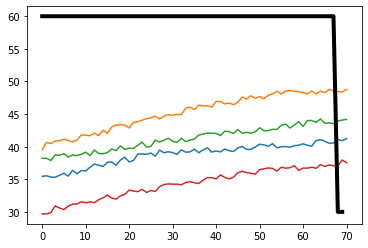

Predicción:  [[0.00909062 0.5915561  0.39935327]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.7689 48.9565 44.4028 37.372 ]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  71  - Datos Recibidos:  [40.7689 48.9565 44.4028 37.372 ]
Objetos restantes en la cola: 0


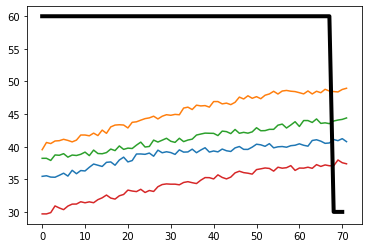

Predicción:  [[0.00979216 0.6434982  0.3467097 ]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [40.6048 48.4844 44.6447 37.5157]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  72  - Datos Recibidos:  [40.6048 48.4844 44.6447 37.5157]
Objetos restantes en la cola: 0


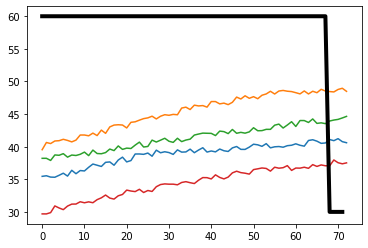

Predicción:  [[0.01021937 0.6792513  0.31052935]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [41.5383 48.7301 44.1725 37.295 ]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  73  - Datos Recibidos:  [41.5383 48.7301 44.1725 37.295 ]
Objetos restantes en la cola: 0


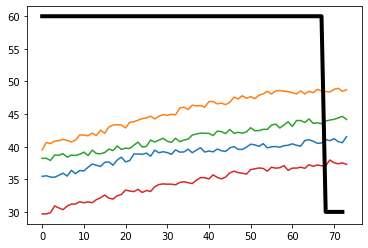

Predicción:  [[0.01050349 0.70406383 0.2854327 ]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [41.2908 49.2945 44.1257 38.0893]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  74  - Datos Recibidos:  [41.2908 49.2945 44.1257 38.0893]
Objetos restantes en la cola: 0


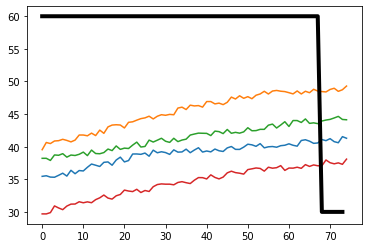

Predicción:  [[0.01070538 0.72607213 0.26322252]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [41.4149 48.6531 44.4818 37.9505]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  75  - Datos Recibidos:  [41.4149 48.6531 44.4818 37.9505]
Objetos restantes en la cola: 0


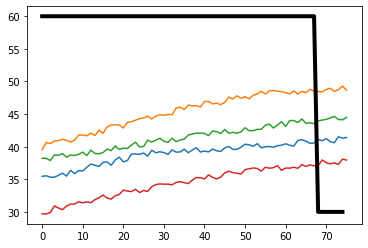

Predicción:  [[0.01092126 0.7519608  0.23711792]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [41.6872 48.5575 44.9535 37.6523]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  76  - Datos Recibidos:  [41.6872 48.5575 44.9535 37.6523]
Objetos restantes en la cola: 0


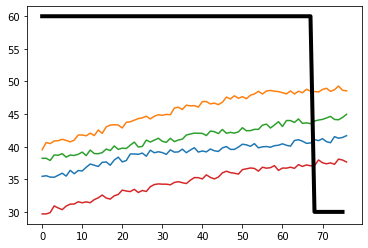

Predicción:  [[0.01111595 0.7803056  0.20857838]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [41.5499 48.8042 44.3683 37.6874]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  77  - Datos Recibidos:  [41.5499 48.8042 44.3683 37.6874]
Objetos restantes en la cola: 0


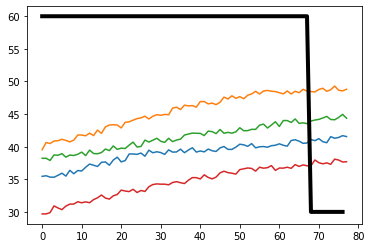

Predicción:  [[0.01132043 0.8036868  0.18499279]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [41.7619 49.0817 45.1579 38.0142]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  78  - Datos Recibidos:  [41.7619 49.0817 45.1579 38.0142]
Objetos restantes en la cola: 0


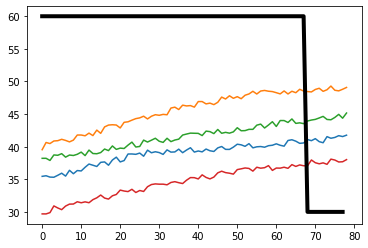

Predicción:  [[0.0115218  0.8241561  0.16432202]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [41.7119 48.8732 45.2308 38.3105]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  79  - Datos Recibidos:  [41.7119 48.8732 45.2308 38.3105]
Objetos restantes en la cola: 0


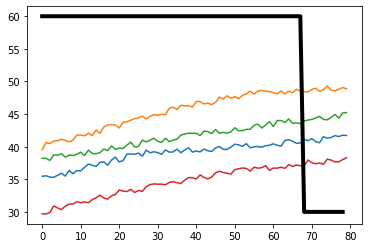

Predicción:  [[0.01170545 0.8457726  0.14252193]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [41.6919 49.0744 44.4738 38.0708]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  80  - Datos Recibidos:  [41.6919 49.0744 44.4738 38.0708]
Objetos restantes en la cola: 0


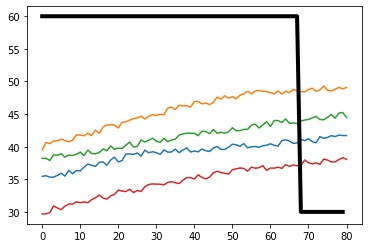

Predicción:  [[0.01185374 0.8670372  0.12110915]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [41.903  49.3552 44.8629 38.4151]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  81  - Datos Recibidos:  [41.903  49.3552 44.8629 38.4151]
Objetos restantes en la cola: 0


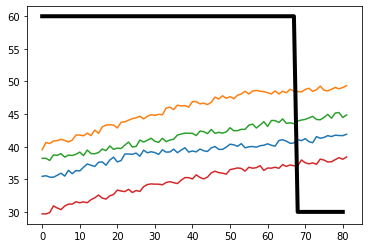

Predicción:  [[0.01197884 0.88658506 0.10143612]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [42.3064 49.206  44.9148 39.2732]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  82  - Datos Recibidos:  [42.3064 49.206  44.9148 39.2732]
Objetos restantes en la cola: 0


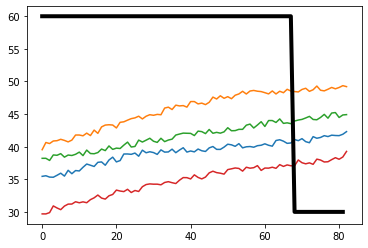

Predicción:  [[0.01205683 0.90441906 0.08352409]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [42.4251 49.5986 45.2495 39.3465]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  83  - Datos Recibidos:  [42.4251 49.5986 45.2495 39.3465]
Objetos restantes en la cola: 0


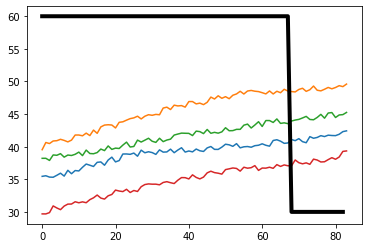

Predicción:  [[0.01211839 0.92495483 0.06292674]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [42.1969 49.6925 45.8698 38.8839]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  84  - Datos Recibidos:  [42.1969 49.6925 45.8698 38.8839]
Objetos restantes en la cola: 0


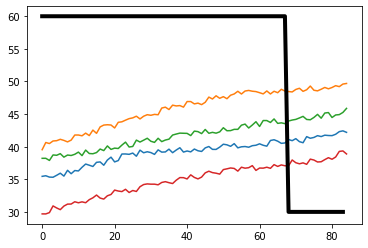

Predicción:  [[0.01212074 0.9452074  0.04267186]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [42.5921 50.2393 46.6443 38.9836]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  85  - Datos Recibidos:  [42.5921 50.2393 46.6443 38.9836]
Objetos restantes en la cola: 0


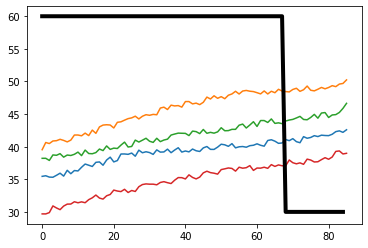

Predicción:  [[0.01200452 0.9597722  0.02822325]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [42.091  50.3102 46.8627 39.6247]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  86  - Datos Recibidos:  [42.091  50.3102 46.8627 39.6247]
Objetos restantes en la cola: 0


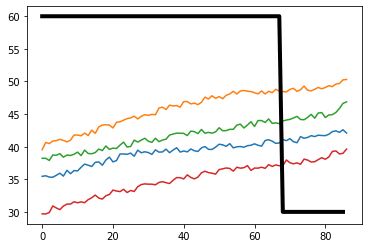

Predicción:  [[0.01176639 0.9683859  0.01984764]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [42.697  50.3866 46.32   39.7533]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  87  - Datos Recibidos:  [42.697  50.3866 46.32   39.7533]
Objetos restantes en la cola: 0


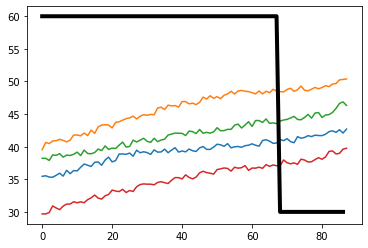

Predicción:  [[0.01146232 0.9736453  0.01489227]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [42.0411 50.1664 46.941  39.6537]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  88  - Datos Recibidos:  [42.0411 50.1664 46.941  39.6537]
Objetos restantes en la cola: 0


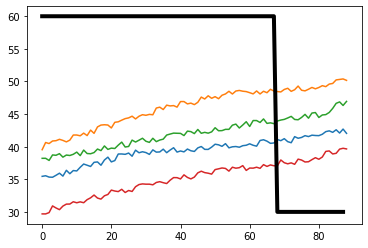

Predicción:  [[0.01114616 0.9773821  0.01147165]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [42.0712 49.9385 47.4641 40.1404]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  89  - Datos Recibidos:  [42.0712 49.9385 47.4641 40.1404]
Objetos restantes en la cola: 0


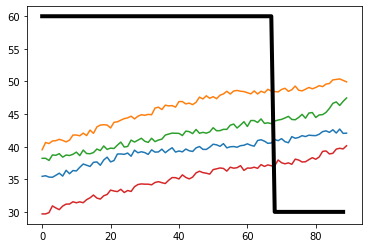

Predicción:  [[0.01081382 0.9801989  0.00898732]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [43.0997 50.9484 47.1507 39.9504]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  90  - Datos Recibidos:  [43.0997 50.9484 47.1507 39.9504]
Objetos restantes en la cola: 0


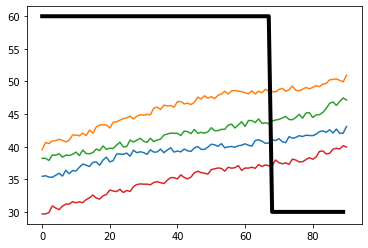

Predicción:  [[0.01051529 0.9821961  0.0072886 ]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [43.0764 50.9833 48.2989 40.0836]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  91  - Datos Recibidos:  [43.0764 50.9833 48.2989 40.0836]
Objetos restantes en la cola: 0


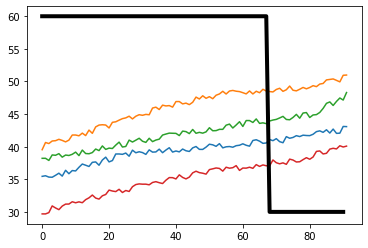

Predicción:  [[0.01022634 0.98389727 0.00587636]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [43.2414 50.4054 48.7003 40.0816]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  92  - Datos Recibidos:  [43.2414 50.4054 48.7003 40.0816]
Objetos restantes en la cola: 0


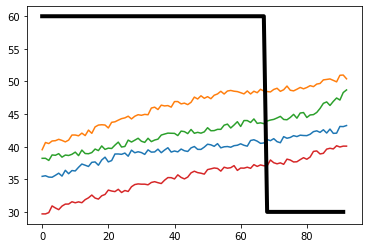

Predicción:  [[0.00997331 0.98537874 0.00464789]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [43.2803 51.0428 48.8437 40.5067]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  93  - Datos Recibidos:  [43.2803 51.0428 48.8437 40.5067]
Objetos restantes en la cola: 0


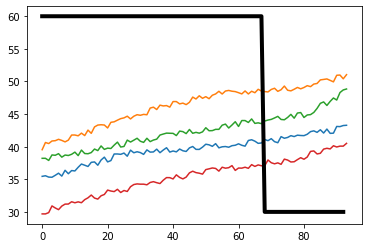

Predicción:  [[0.00981321 0.9865215  0.00366528]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [43.4227 50.5713 49.1676 40.1496]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  94  - Datos Recibidos:  [43.4227 50.5713 49.1676 40.1496]
Objetos restantes en la cola: 0


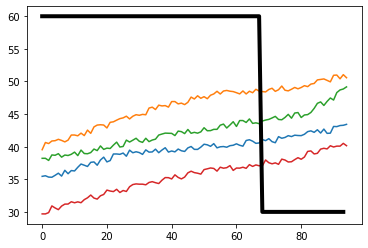

Predicción:  [[0.00972363 0.9872847  0.00299159]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [42.9309 51.0396 49.5349 40.6695]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  95  - Datos Recibidos:  [42.9309 51.0396 49.5349 40.6695]
Objetos restantes en la cola: 0


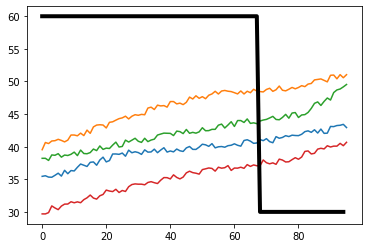

Predicción:  [[0.00962284 0.9878449  0.00253228]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [43.8163 51.7133 49.0944 40.4518]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  96  - Datos Recibidos:  [43.8163 51.7133 49.0944 40.4518]
Objetos restantes en la cola: 0


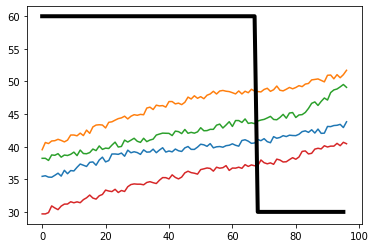

Predicción:  [[0.00943693 0.98836434 0.00219863]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [43.5555 51.3583 49.3039 40.4038]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  97  - Datos Recibidos:  [43.5555 51.3583 49.3039 40.4038]
Objetos restantes en la cola: 0


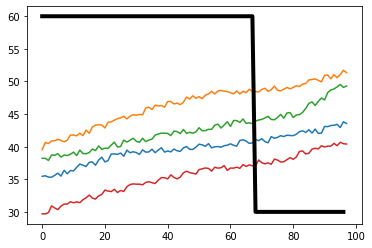

Predicción:  [[0.0092147  0.98884785 0.00193747]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [44.4806 51.7695 49.7313 41.1874]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  98  - Datos Recibidos:  [44.4806 51.7695 49.7313 41.1874]
Objetos restantes en la cola: 0


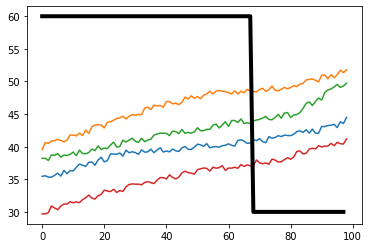

Predicción:  [[0.00909472 0.98920536 0.0016998 ]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [44.3084 51.8754 50.297  41.6882]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  99  - Datos Recibidos:  [44.3084 51.8754 50.297  41.6882]
Objetos restantes en la cola: 0


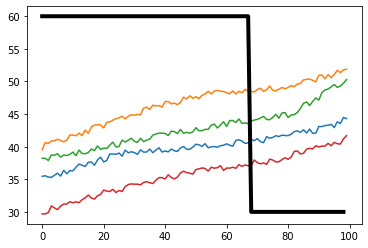

Predicción:  [[0.00912755 0.98943174 0.00144074]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [45.2689 52.9397 50.0997 41.537 ]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  100  - Datos Recibidos:  [45.2689 52.9397 50.0997 41.537 ]
Objetos restantes en la cola: 0


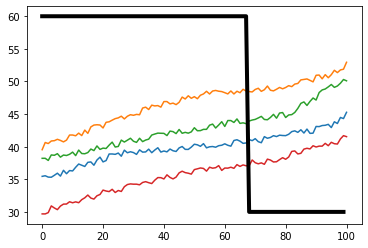

Predicción:  [[0.00936914 0.9894847  0.00114615]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [44.8635 53.1518 50.2831 41.5803]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  101  - Datos Recibidos:  [44.8635 53.1518 50.2831 41.5803]
Objetos restantes en la cola: 0


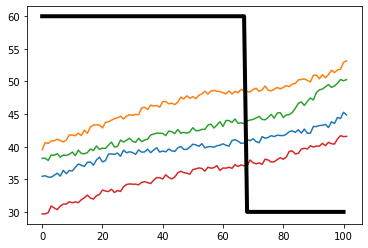

Predicción:  [[9.724107e-03 9.893917e-01 8.842554e-04]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [45.4244 52.9817 51.1704 41.8186]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  102  - Datos Recibidos:  [45.4244 52.9817 51.1704 41.8186]
Objetos restantes en la cola: 0


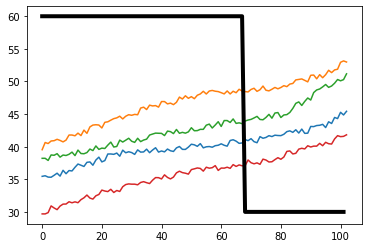

Predicción:  [[1.0191128e-02 9.8912585e-01 6.8305479e-04]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [45.2581 53.2438 51.6184 42.8472]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  103  - Datos Recibidos:  [45.2581 53.2438 51.6184 42.8472]
Objetos restantes en la cola: 0


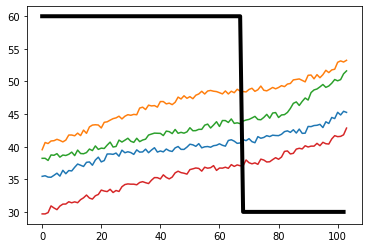

Predicción:  [[1.1059965e-02 9.8840404e-01 5.3593772e-04]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [46.0923 53.4334 51.3571 42.8392]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  104  - Datos Recibidos:  [46.0923 53.4334 51.3571 42.8392]
Objetos restantes en la cola: 0


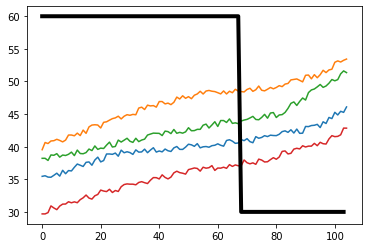

Predicción:  [[1.2561848e-02 9.8702198e-01 4.1612834e-04]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [46.339  54.0117 52.1806 42.7989]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  105  - Datos Recibidos:  [46.339  54.0117 52.1806 42.7989]
Objetos restantes en la cola: 0


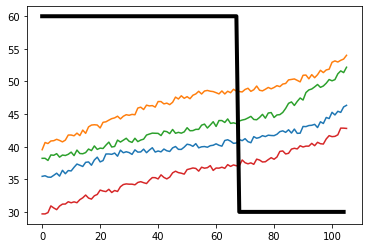

Predicción:  [[1.47669995e-02 9.84915972e-01 3.16981692e-04]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [46.621  54.075  52.2859 43.6378]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  106  - Datos Recibidos:  [46.621  54.075  52.2859 43.6378]
Objetos restantes en la cola: 0


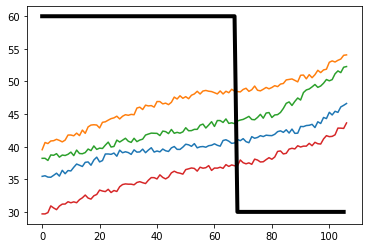

Predicción:  [[1.7680090e-02 9.8207837e-01 2.4149136e-04]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [47.0081 54.5317 52.5245 43.4704]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  107  - Datos Recibidos:  [47.0081 54.5317 52.5245 43.4704]
Objetos restantes en la cola: 0


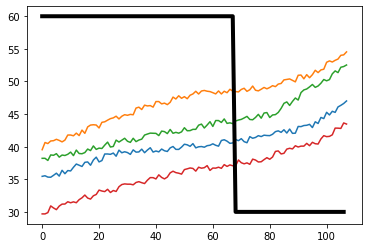

Predicción:  [[2.2105044e-02 9.7771090e-01 1.8398896e-04]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [47.7422 54.7829 52.5256 44.5211]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  108  - Datos Recibidos:  [47.7422 54.7829 52.5256 44.5211]
Objetos restantes en la cola: 0


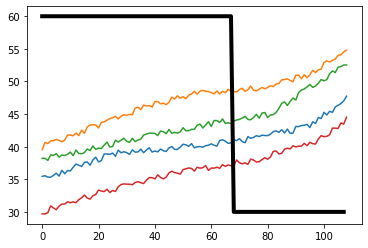

Predicción:  [[3.1549603e-02 9.6831459e-01 1.3586291e-04]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [47.6948 54.335  52.3254 44.5824]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  109  - Datos Recibidos:  [47.6948 54.335  52.3254 44.5824]
Objetos restantes en la cola: 0


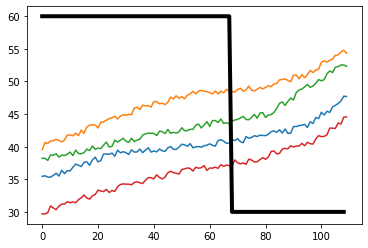

Predicción:  [[5.0905466e-02 9.4899768e-01 9.6877768e-05]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [47.5233 55.1155 52.5385 44.3726]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  110  - Datos Recibidos:  [47.5233 55.1155 52.5385 44.3726]
Objetos restantes en la cola: 0


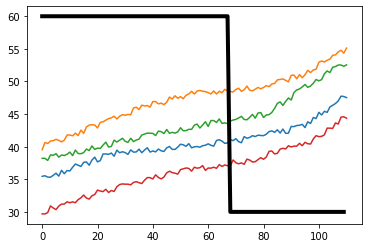

Predicción:  [[8.9023903e-02 9.1090906e-01 6.7042507e-05]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [48.2047 55.1392 53.484  44.6804]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  111  - Datos Recibidos:  [48.2047 55.1392 53.484  44.6804]
Objetos restantes en la cola: 0


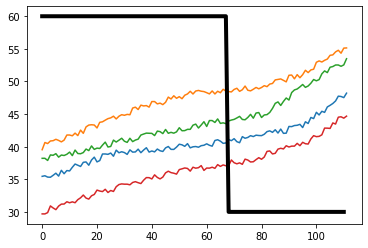

Predicción:  [[1.4894219e-01 8.5101146e-01 4.6337969e-05]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [48.8352 55.5426 53.5123 45.0975]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  112  - Datos Recibidos:  [48.8352 55.5426 53.5123 45.0975]
Objetos restantes en la cola: 0


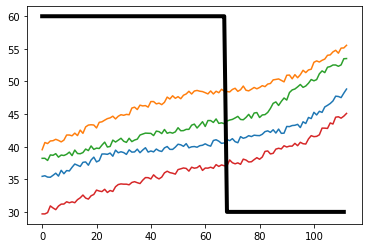

Predicción:  [[2.3084585e-01 7.6912230e-01 3.1836949e-05]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [48.7681 55.7767 53.8056 45.7211]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  113  - Datos Recibidos:  [48.7681 55.7767 53.8056 45.7211]
Objetos restantes en la cola: 0


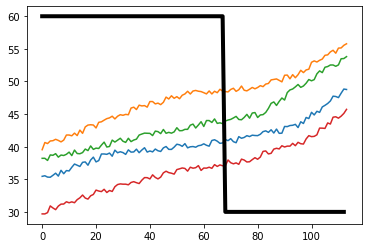

Predicción:  [[3.3676615e-01 6.6321284e-01 2.1040036e-05]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [49.0918 56.495  53.9617 45.5613]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  114  - Datos Recibidos:  [49.0918 56.495  53.9617 45.5613]
Objetos restantes en la cola: 0


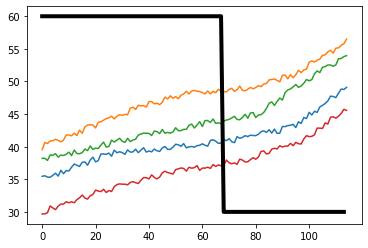

Predicción:  [[4.5253539e-01 5.4745114e-01 1.3454265e-05]] Etiqueta:  1
Estado en 50 segundos:  ESTADO MEDIO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [49.5347 56.43   53.8106 45.9051]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  115  - Datos Recibidos:  [49.5347 56.43   53.8106 45.9051]
Objetos restantes en la cola: 0


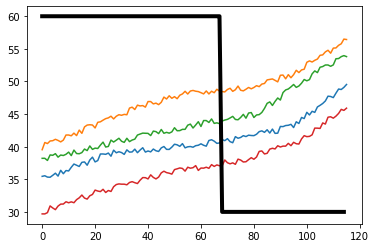

Predicción:  [[5.6642646e-01 4.3356526e-01 8.3151645e-06]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [49.3709 56.5207 54.5417 46.5505]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  116  - Datos Recibidos:  [49.3709 56.5207 54.5417 46.5505]
Objetos restantes en la cola: 0


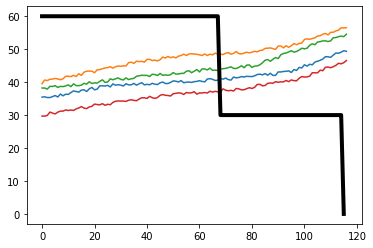

Predicción:  [[6.5829009e-01 3.4170470e-01 5.1908946e-06]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [49.7839 56.0134 53.9215 46.7434]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  117  - Datos Recibidos:  [49.7839 56.0134 53.9215 46.7434]
Objetos restantes en la cola: 0


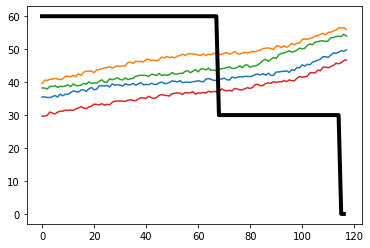

Predicción:  [[7.5140584e-01 2.4859127e-01 2.9347996e-06]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [49.8898 56.8478 54.1457 47.287 ]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  118  - Datos Recibidos:  [49.8898 56.8478 54.1457 47.287 ]
Objetos restantes en la cola: 0


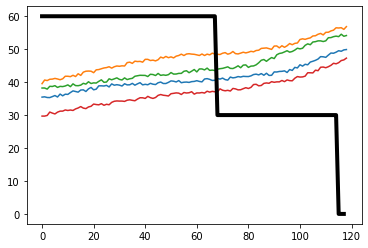

Predicción:  [[8.3907634e-01 1.6092223e-01 1.4384358e-06]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [50.1494 56.1744 54.2544 47.6652]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  119  - Datos Recibidos:  [50.1494 56.1744 54.2544 47.6652]
Objetos restantes en la cola: 0


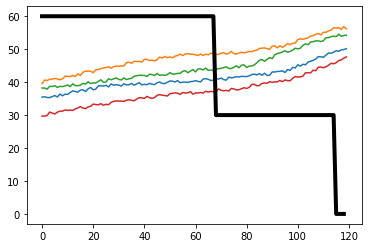

Predicción:  [[9.0920478e-01 9.0794556e-02 6.0166036e-07]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [50.4862 56.5649 54.7735 47.6813]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  120  - Datos Recibidos:  [50.4862 56.5649 54.7735 47.6813]
Objetos restantes en la cola: 0


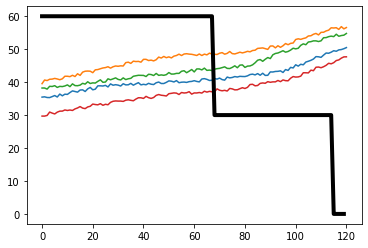

Predicción:  [[9.5176411e-01 4.8235621e-02 2.3827864e-07]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [50.456  57.0618 54.3063 48.209 ]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  121  - Datos Recibidos:  [50.456  57.0618 54.3063 48.209 ]
Objetos restantes en la cola: 1


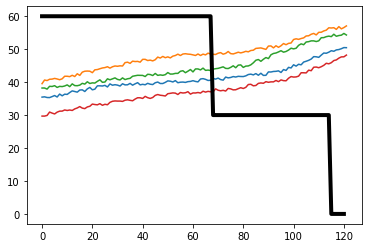

Predicción:  [[9.7510499e-01 2.4894888e-02 9.2255981e-08]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [50.5618 57.0659 54.7053 48.0926]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  122  - Datos Recibidos:  [50.5618 57.0659 54.7053 48.0926]
Objetos restantes en la cola: 0


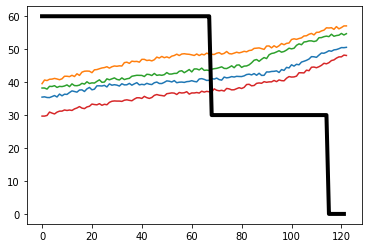

Predicción:  [[9.86684144e-01 1.33158285e-02 3.77915867e-08]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [50.7805 56.7229 54.4834 48.9402]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  123  - Datos Recibidos:  [50.7805 56.7229 54.4834 48.9402]
Objetos restantes en la cola: 0


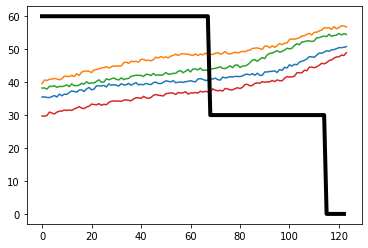

Predicción:  [[9.9254405e-01 7.4559203e-03 1.6464780e-08]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [51.3243 57.2215 54.5405 49.4484]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  124  - Datos Recibidos:  [51.3243 57.2215 54.5405 49.4484]
Objetos restantes en la cola: 0


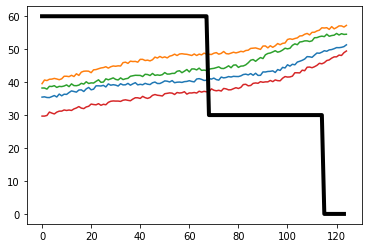

Predicción:  [[9.954614e-01 4.538643e-03 7.942596e-09]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [51.2243 57.2817 54.6591 48.9648]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  125  - Datos Recibidos:  [51.2243 57.2817 54.6591 48.9648]
Objetos restantes en la cola: 0


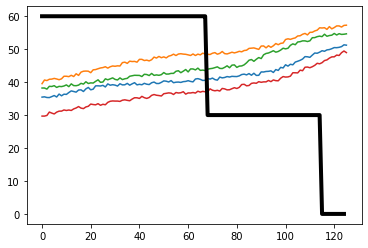

Predicción:  [[9.9710041e-01 2.8996111e-03 4.0174384e-09]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [51.2487 57.3842 55.3094 49.543 ]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  126  - Datos Recibidos:  [51.2487 57.3842 55.3094 49.543 ]
Objetos restantes en la cola: 0


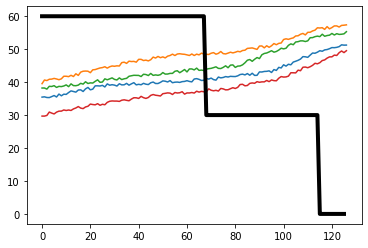

Predicción:  [[9.9804270e-01 1.9572964e-03 2.1622337e-09]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [50.8917 57.7572 54.6174 49.4513]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  127  - Datos Recibidos:  [50.8917 57.7572 54.6174 49.4513]
Objetos restantes en la cola: 0


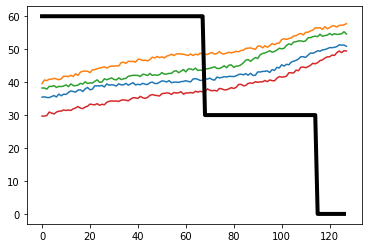

Predicción:  [[9.9860942e-01 1.3905864e-03 1.2478859e-09]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [51.2336 57.891  54.6909 48.9503]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  128  - Datos Recibidos:  [51.2336 57.891  54.6909 48.9503]
Objetos restantes en la cola: 0


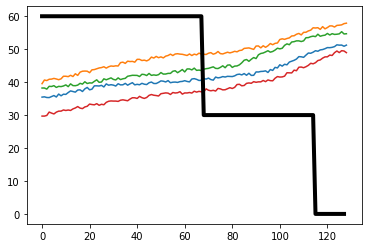

Predicción:  [[9.9894935e-01 1.0506756e-03 7.9138729e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [51.8205 57.7263 55.7363 48.9488]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  129  - Datos Recibidos:  [51.8205 57.7263 55.7363 48.9488]
Objetos restantes en la cola: 0


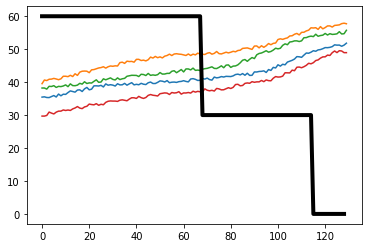

Predicción:  [[9.9912506e-01 8.7494485e-04 5.7629329e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [52.0386 58.0049 55.0731 48.7705]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  130  - Datos Recibidos:  [52.0386 58.0049 55.0731 48.7705]
Objetos restantes en la cola: 0


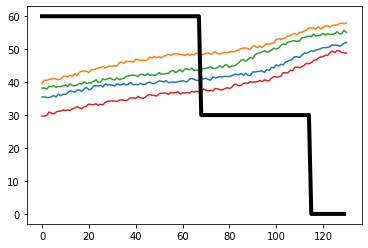

Predicción:  [[9.9918729e-01 8.1273325e-04 4.9194609e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [52.0413 57.4637 55.8203 48.8919]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  131  - Datos Recibidos:  [52.0413 57.4637 55.8203 48.8919]
Objetos restantes en la cola: 0


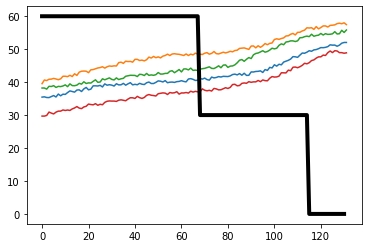

Predicción:  [[9.9917006e-01 8.2997227e-04 4.8214671e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [51.8067 58.4662 55.2666 49.3342]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  132  - Datos Recibidos:  [51.8067 58.4662 55.2666 49.3342]
Objetos restantes en la cola: 0


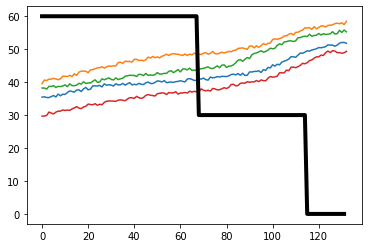

Predicción:  [[9.9910969e-01 8.9030387e-04 5.1124865e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [52.04   58.5894 55.2671 49.3535]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  133  - Datos Recibidos:  [52.04   58.5894 55.2671 49.3535]
Objetos restantes en la cola: 0


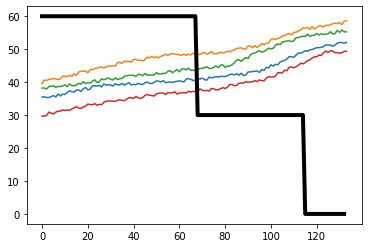

Predicción:  [[9.9904102e-01 9.5890777e-04 5.4682153e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [51.8685 58.3945 55.4021 49.4544]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  134  - Datos Recibidos:  [51.8685 58.3945 55.4021 49.4544]
Objetos restantes en la cola: 0


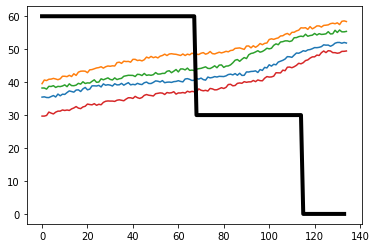

Predicción:  [[9.9898988e-01 1.0101222e-03 5.6598287e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [51.8907 58.1617 55.8155 49.6737]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  135  - Datos Recibidos:  [51.8907 58.1617 55.8155 49.6737]
Objetos restantes en la cola: 0


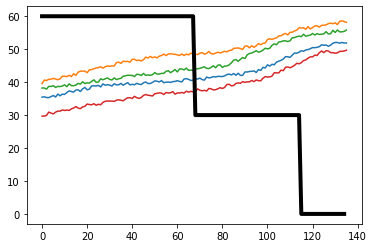

Predicción:  [[9.9899131e-01 1.0086986e-03 5.4205712e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [52.4106 58.2505 55.8571 49.0438]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  136  - Datos Recibidos:  [52.4106 58.2505 55.8571 49.0438]
Objetos restantes en la cola: 0


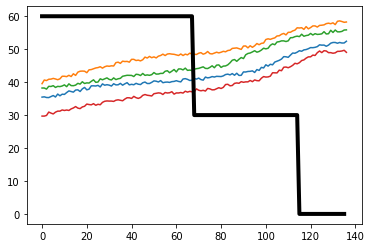

Predicción:  [[9.990357e-01 9.643326e-04 4.873163e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [52.2459 58.9861 55.6952 49.3129]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  137  - Datos Recibidos:  [52.2459 58.9861 55.6952 49.3129]
Objetos restantes en la cola: 0


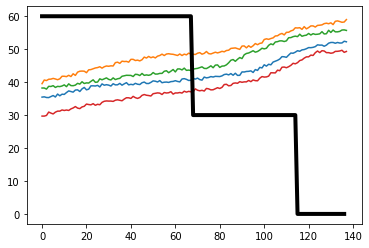

Predicción:  [[9.9909484e-01 9.0519554e-04 4.2842671e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [52.2191 58.6612 55.5909 49.5467]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  138  - Datos Recibidos:  [52.2191 58.6612 55.5909 49.5467]
Objetos restantes en la cola: 0


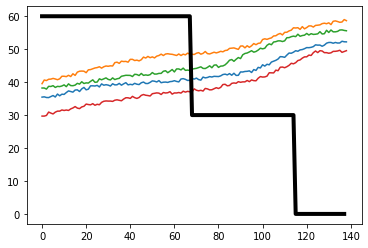

Predicción:  [[9.9913090e-01 8.6916453e-04 3.8963255e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [52.3276 58.8466 56.2041 49.5723]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  139  - Datos Recibidos:  [52.3276 58.8466 56.2041 49.5723]
Objetos restantes en la cola: 0


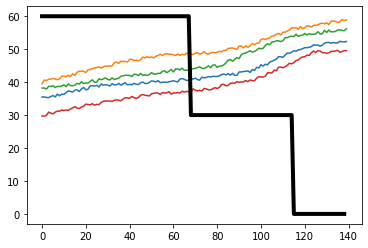

Predicción:  [[9.991510e-01 8.490409e-04 3.651059e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [52.9637 58.7664 55.8855 49.3053]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  140  - Datos Recibidos:  [52.9637 58.7664 55.8855 49.3053]
Objetos restantes en la cola: 0


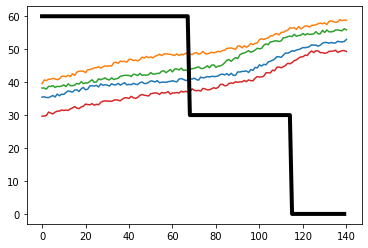

Predicción:  [[9.9916160e-01 8.3843747e-04 3.4811254e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [52.725  59.3146 56.5431 49.9269]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  141  - Datos Recibidos:  [52.725  59.3146 56.5431 49.9269]
Objetos restantes en la cola: 0


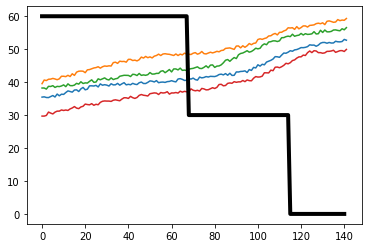

Predicción:  [[9.9916875e-01 8.3122397e-04 3.3312858e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [52.7947 58.8819 56.6123 49.6868]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  142  - Datos Recibidos:  [52.7947 58.8819 56.6123 49.6868]
Objetos restantes en la cola: 0


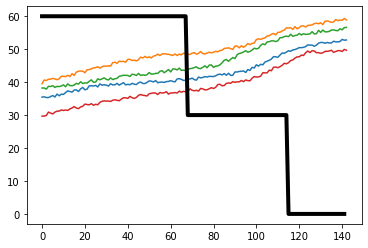

Predicción:  [[9.9917847e-01 8.2154904e-04 3.1453715e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [52.8272 59.115  56.7543 49.9757]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  143  - Datos Recibidos:  [52.8272 59.115  56.7543 49.9757]
Objetos restantes en la cola: 0


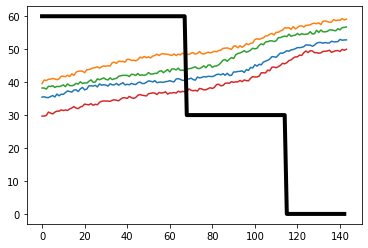

Predicción:  [[9.9920422e-01 7.9583842e-04 2.8790015e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [53.452  58.8352 56.9601 49.4271]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  144  - Datos Recibidos:  [53.452  58.8352 56.9601 49.4271]
Objetos restantes en la cola: 0


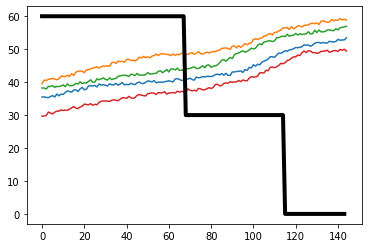

Predicción:  [[9.992483e-01 7.516831e-04 2.539165e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [53.4945 59.104  56.631  50.1999]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  145  - Datos Recibidos:  [53.4945 59.104  56.631  50.1999]
Objetos restantes en la cola: 0


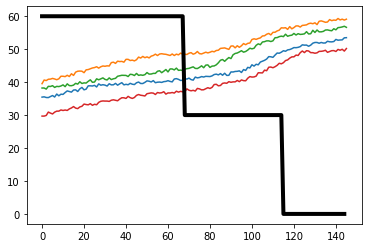

Predicción:  [[9.9930286e-01 6.9709634e-04 2.1915274e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [53.202  59.8775 56.233  49.5942]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  146  - Datos Recibidos:  [53.202  59.8775 56.233  49.5942]
Objetos restantes en la cola: 0


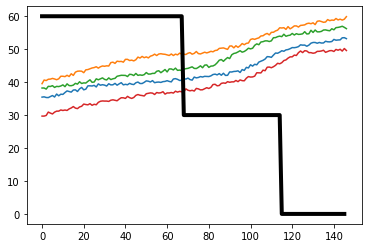

Predicción:  [[9.9934536e-01 6.5462390e-04 1.9178688e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [53.5731 59.8927 57.0753 50.02  ]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  147  - Datos Recibidos:  [53.5731 59.8927 57.0753 50.02  ]
Objetos restantes en la cola: 0


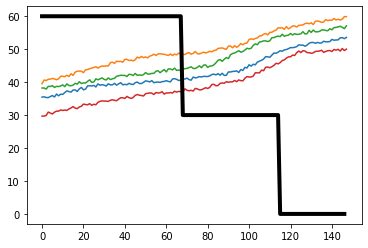

Predicción:  [[9.9937880e-01 6.2120688e-04 1.7038548e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [53.2778 59.6583 56.5066 49.6306]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  148  - Datos Recibidos:  [53.2778 59.6583 56.5066 49.6306]
Objetos restantes en la cola: 0


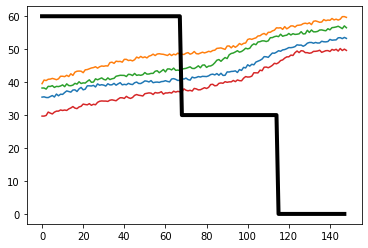

Predicción:  [[9.9939084e-01 6.0908980e-04 1.5891076e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO
Proceso Simulador de Lecturas - Proc.Nro. 7276
Lecturas enviadas:  [53.5548 60.3135 56.9267 50.2763]
Proceso Predictor - Proc.Nro. 12400
Predicción Nro.:  149  - Datos Recibidos:  [53.5548 60.3135 56.9267 50.2763]
Objetos restantes en la cola: 0


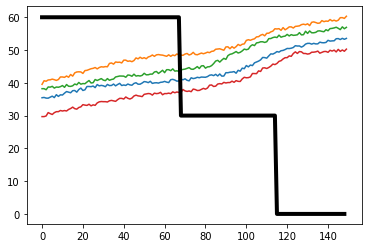

Predicción:  [[9.9939179e-01 6.0816261e-04 1.5247811e-10]] Etiqueta:  0
Estado en 50 segundos:  ESTADO CRITICO


In [6]:
# Lectura del dataset sintético
sds = pd.read_csv('SyntheticTimeSerie_1.txt', sep='\t', header=None)
sds = sds.to_numpy()

# Semáforo para acceso a la consola
console_lock = threading.Lock()

# Lectura del modelo de aprendizaje profundo
with open('model_m.json', 'r') as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# Lectura de los parámetros entrenados
loaded_model.load_weights('model_m.h5')

# Compilación del modelo
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Etiquetas con los estados posibles de salida de predicción
text_labels = ['ESTADO CRITICO', 'ESTADO MEDIO', 'EFICIENCIA TOTAL']

# Creación del repositorio para intercambio de datos entre procesos (FIFO)
q = queue.Queue()

# Visualización de la estructura del modelo de aprendizaje profundo leído
loaded_model.summary()

# Creación de los procesos concurrentes
p1 = threading.Thread(target=simulator, args=('p1', console_lock))
p2 = threading.Thread(target=predictor, args=('p2', console_lock, loaded_model))

# Inicio de la ejecución de los procesos
p1.start()
p2.start()
